# Introduction to Pandas

## What is it?
`pandas` is an open source **Python** library for data analysis. Python has always been great for prepping and munging data, but it's never been great for analysis - you'd usually end up using **R** or loading it into a database and using SQL (or worse, Excel). **pandas** makes Python great for analysis.
![Pandas](https://github.com/serivan/mldmlab/blob/master/Python-Introduction/scripts/pandas.jpg?raw=1)

> `pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working > with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building
> block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming > the most powerful and flexible open source data analysis / manipulation tool available in any language. It is 
> already well on its way toward this goal.

`pandas` is well suited for many different kinds of data:

  - Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
  - Ordered and unordered (not necessarily fixed-frequency) time series data.
  - Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
  - Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas, `Series` (1-dimensional) and `DataFrame` (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, `DataFrame` provides everything that R’s data.frame provides and much more. `pandas` is built on top of `numpy` and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:

  - Easy handling of missing data (represented as `nan`) in floating point as well as non-floating point data
  - Size mutability: columns can be inserted and deleted from `DataFrame` and higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let `Series`, `DataFrame`, etc. automatically align the data for you in computations
  - Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
  - Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into `DataFrame` objects
  - Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
  - Intuitive merging and joining data sets
  - Flexible reshaping and pivoting of data sets
  - Hierarchical labeling of axes (possible to have multiple labels per tick)
  - Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
  - Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## Data Structures
`pandas` introduces two new data structures to Python - `Series` and `DataFrame`, both of which are built on top of `numpy` (this means it's fast).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Most common way to import `pandas` is

In [2]:
import pandas as pd

## Series
A `Series` is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [3]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Tonda', 3.14, -1789710578, 'Blaník'])
s

0              7
1          Tonda
2           3.14
3    -1789710578
4         Blaník
dtype: object

Alternatively, you can specify an index to use when creating the `Series`.

In [4]:
s = pd.Series([7, 'Tonda', 3.14, -1789710578, 'Blaník'], index=['A', 'Z', 'C', 'Y', 'E'])
s

A              7
Z          Tonda
C           3.14
Y    -1789710578
E         Blaník
dtype: object

You can also assign a name to the `Series`.

In [5]:
s = pd.Series([7, 'Tonda', 3.14, -1789710578, 'Blaník'], index=['A', 'Z', 'C', 'Y', 'E'], name='Stream')
s

A              7
Z          Tonda
C           3.14
Y    -1789710578
E         Blaník
Name: Stream, dtype: object

The `Series` constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [6]:
d = {'Milan': 1000, 'Rome': 1300, 'Naples': 900, 'Venice': 1100,
     'Brescia': 450, 'Trieste': None}
cities = pd.Series(d)
cities

Milan      1000.0
Rome       1300.0
Naples      900.0
Venice     1100.0
Brescia     450.0
Trieste       NaN
dtype: float64

You can use the index to select specific items from the `Series` ...

In [7]:
cities['Rome']

1300.0

In [8]:
cities[['Rome', 'Milan', 'Naples']]

Rome      1300.0
Milan     1000.0
Naples     900.0
dtype: float64

Or you can use boolean indexing for selection.

In [9]:
cities[cities < 1000]

Naples     900.0
Brescia    450.0
dtype: float64

You can also change the values in a `Series` on the fly.

In [10]:
# changing based on the index
print('Old value:', cities['Rome'])
cities['Rome'] = 1400
print('New value:', cities['Rome'])

Old value: 1300.0
New value: 1400.0


In [11]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Naples     900.0
Brescia    450.0
dtype: float64


Naples     750.0
Brescia    750.0
dtype: float64


What if you aren't sure whether an item is in the `Series`? You can check using idiomatic Python.

In [12]:
print('Turin' in cities)
print('Venice' in cities)

False
True


Mathematical operations can be done using scalars and functions.

In [13]:
# divide city values by 3
cities / 3

Milan      333.333333
Rome       466.666667
Naples     250.000000
Venice     366.666667
Brescia    250.000000
Trieste           NaN
dtype: float64

In [14]:
# square city values
cities**2

Milan      1000000.0
Rome       1960000.0
Naples      562500.0
Venice     1210000.0
Brescia     562500.0
Trieste          NaN
dtype: float64

You can add two `Series` together, which returns a union of the two `Series` with the addition occurring on the shared index values. Values on either `Series` that did not have a shared index will produce a NULL/NaN (not a number).

In [15]:
print(cities[['Rome', 'Milan', 'Naples']])
print('\n')
print(cities[['Brescia', 'Milan']])
print('\n')
print(cities[['Rome', 'Milan', 'Naples']] + cities[['Venice', 'Naples']])

Rome      1400.0
Milan     1000.0
Naples     750.0
dtype: float64


Brescia     750.0
Milan      1000.0
dtype: float64


Milan        NaN
Naples    1500.0
Rome         NaN
Venice       NaN
dtype: float64


Notice that because Milan, Venice, and Rome were not found in both Series, they were returned with NULL/NaN values.

NULL checking can be performed with isnull and notnull.

In [16]:
# returns a boolean series indicating which values aren't NULL
cities.notnull()

Milan       True
Rome        True
Naples      True
Venice      True
Brescia     True
Trieste    False
dtype: bool

In [17]:
# use boolean logic to grab the NULL cities
print(cities.isnull())
print('\n')
print(cities[cities.isnull()])

Milan      False
Rome       False
Naples     False
Venice     False
Brescia    False
Trieste     True
dtype: bool


Trieste   NaN
dtype: float64


## DataFrame
A `DataFrame` is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a `DataFrame` as a group of `Series` objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with `DataFrames`.

### Reading Data
To create a `DataFrame` out of common Python data structures, we can pass a dictionary of lists to the `DataFrame` constructor.

In [18]:
data = {'anno': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
        'v1': [1524, 1607, 1793, 1751, 1629, 1563, 1564, 1415],
        'v2': [964, 1130, 1168, 1031, 1077, 1114, 1092, 1018]}
myData = pd.DataFrame(data)
myData

,anno,v1,v2
0,2009,1524,964
1,2010,1607,1130
2,2011,1793,1168
3,2012,1751,1031
4,2013,1629,1077
5,2014,1563,1114
6,2015,1564,1092
7,2016,1415,1018


You can create index from any column

In [19]:
r = myData.set_index('anno')
r

,v1,v2
anno,,
2009,1524,964
2010,1607,1130
2011,1793,1168
2012,1751,1031
2013,1629,1077
2014,1563,1114
2015,1564,1092
2016,1415,1018


This allows you to easily access data based on 'anno'.

In [20]:
r.loc[2013]

v1    1629
v2    1077
Name: 2013, dtype: int64

The new values could be calculated and assigned to new column

In [21]:
myData['v3'] = myData['v2'] / myData['v1']
myData

,anno,v1,v2,v3
0,2009,1524,964,0.632546
1,2010,1607,1130,0.703174
2,2011,1793,1168,0.651422
3,2012,1751,1031,0.588806
4,2013,1629,1077,0.661142
5,2014,1563,1114,0.712732
6,2015,1564,1092,0.698210
7,2016,1415,1018,0.719435


Would you like to change formatting style? You can do it.

In [22]:
myData.set_index('anno').style.format({
    'v1': '{:,d}'.format,
    'v2': '{:,d}'.format,
    'v3': '{:.2%}'.format,
})

,v1,v2,v3
anno,,,
2009,"1,524",964,63.25%
2010,"1,607","1,130",70.32%
2011,"1,793","1,168",65.14%
2012,"1,751","1,031",58.88%
2013,"1,629","1,077",66.11%
2014,"1,563","1,114",71.27%
2015,"1,564","1,092",69.82%
2016,"1,415","1,018",71.94%


Much more often, you'll have a dataset you want to read into a DataFrame. Let's go through several common ways of doing so.

### CSV

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [23]:
# Source: baseball-reference.com/players/r/riverma01.shtml
# !head -n 5 titanic.csv

### Demonstation of pandas on Titanic dataset

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/titanic.csv')

`pandas` various reader functions have many parameters allowing you to do things like skipping lines of the file, parsing dates, or specifying how to handle NA/NULL datapoints.

There's also a set of writer functions for writing to a variety of formats (CSVs, HTML tables, JSON). They function exactly as you'd expect and are typically called to_format:

    my_dataframe.to_csv('path_to_file.csv')

Take a look at [the IO documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) to familiarize yourself with file reading/writing functionality.

### Excel

Know who hates VBA? Me. I bet you do, too. Thankfully, pandas allows you to read and write Excel files, so you can easily read from Excel, write your code in Python, and then write back out to Excel - no need for VBA. Check [`read_excel()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader) method.

### Working with DataFrames

Now that we can get data into a DataFrame, we can finally start working with them. **pandas** has an abundance of functionality, far too much for me to cover in this introduction. I'd encourage anyone interested in diving deeper into the library to check out its [excellent documentation](http://pandas.pydata.org/pandas-docs/stable/). Or just use Google - there are a lot of Stack Overflow questions and blog posts covering specifics of the library.

So back to our titanic dataset. Get some information about it.

### Inspection
**pandas** has a variety of functions for getting basic information about your DataFrame, the most basic of which is using the info method.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


The output tells a few things about our DataFrame.

 - It's obviously an instance of a DataFrame.
 - Each row was assigned an index of 0 to N-1, where N is the number of rows in the DataFrame. pandas will do this by default if an index is not specified. Don't worry, this can be changed later.
 - There are 891 rows (every row must have an index).
 - Our dataset has 15 columns, where few has missing some values (age, embarked, deck and embark_town).
 - The last datatypes of each column, but not necessarily in the corresponding order to the listed columns. You should use the dtypes method to get the datatype for each column.
 - An approximate amount of RAM used to hold the DataFrame. See the .memory_usage method

DataFrame's also have a describe method, which is great for seeing basic statistics about the dataset's numeric columns. Be careful though, since this will return information on all columns of a numeric datatype.

In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


You will notice that I've used the head method regularly throughout this lecture - by default, head displays the first five records of the dataset, while tail displays the last five.

In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Alternatively, Python's regular slicing syntax works as well.

In [29]:
df[10:16]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True


Check dataset dimensions.. how many row and columns?

In [30]:
df.shape

(891, 15)

Print column names and types

In [31]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Selecting data

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

Selecting a single column from the DataFrame will return a Series object.

In [33]:
df['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [34]:
df.age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

To select multiple columns, simply pass a list of column names to the DataFrame, the output of which will be a DataFrame.

In [35]:
df[['age', 'survived']].head()

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


## Selecting with conditions
Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.

In [36]:
df.age[df.age > 35].head()

1     38.0
6     54.0
11    58.0
13    39.0
15    55.0
Name: age, dtype: float64

In [37]:
df[df.age > 35].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True


In [38]:
print(df.iloc[10])
df.iloc[[1, 50, 300]]

survived                 1
pclass                   3
sex                 female
age                      4
sibsp                    1
parch                    1
fare                  16.7
embarked                 S
class                Third
who                  child
adult_male           False
deck                     G
embark_town    Southampton
alive                  yes
alone                False
Name: 10, dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
300,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True


The simplified rules of indexing are:

 - Use loc for label-based indexing
 - Use iloc for positional indexing

I've found that I can usually get by with boolean indexing, loc and iloc, but pandas has a whole host of other ways to do selection.

Only age, sex and pclass of kids passengers who have survived

In [39]:
df[(df.survived == 1 ) & (df.age <= 5 )][['age', 'sex', 'pclass']].head()

,age,sex,pclass
10,4.00,female,3
43,3.00,female,2
58,5.00,female,2
78,0.83,male,2
172,1.00,female,3


## Counting
How many people survived and what is the percentage?

In [40]:
df[df.survived == 1].count()

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [41]:
df.survived[df.survived == 1].count()

342

`value_counts()` provides occurance of each unique values in the column.

In [42]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [43]:
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [44]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [45]:
df[df.survived == 1].sex.value_counts()

female    233
male      109
Name: sex, dtype: int64

### Compute a simple cross-tabulation
Cross tabulation between gender and survived?

In [46]:
pd.crosstab(df.sex, df.survived )

survived,0,1
sex,,
female,81,233
male,468,109


In what class?

In [47]:
pd.crosstab(df['class'], df.survived)

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


Cross tabulation between passenger class and from where they embarked the ship?

In [48]:
pd.crosstab(df.pclass, df.embarked)

embarked,C,Q,S
pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [49]:
df.survived[df.age < 5].value_counts()

1    27
0    13
Name: survived, dtype: int64

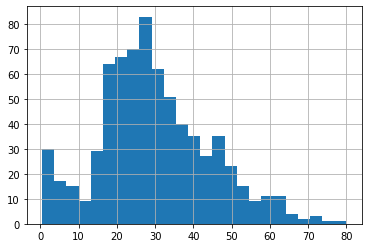

In [50]:
df.age.hist(bins=25);

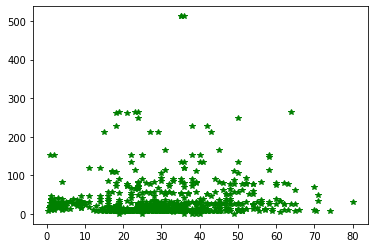

In [51]:
plot(df.age, df.fare, 'g*');

In [52]:
df.fare.sum()

28693.9493

In [53]:
df.fare[df.sex == 'male'].sum()

14727.286500000002

In [54]:
df.fare[df.sex == 'female'].sum()

13966.6628

## Grouping
By `group by` we are referring to a process involving one or more of the following steps

 - **Splitting** the data into groups based on some criteria
 - **Applying** a function to each group independently
 - **Combining** the results into a data structure

Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set into groups and do something with those groups yourself. In the apply step, we might wish to one of the following:

 - Aggregation: computing a summary statistic (or statistics) about each group. Some examples:

    - Compute group sums or means
    - Compute group sizes / counts
    - Transformation: perform some group-specific computations and return a like-indexed. Some examples:

 - Standardizing data (zscore) within group
    - Filling NAs within groups with a value derived from each group
    - Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

 - Discarding data that belongs to groups with only a few members
    - Filtering out data based on the group sum or mean
 - Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories

In [55]:
df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [56]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [57]:
df2.groupby(['X']).get_group('A')

,X,Y
2,A,3
3,A,4


In [58]:
df.groupby('who')['fare'].sum()

who
child     2721.2210
man      13352.0656
woman    12620.6627
Name: fare, dtype: float64

In [59]:
df.groupby('who')['fare'].mean()

who
child    32.785795
man      24.864182
woman    46.570711
Name: fare, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


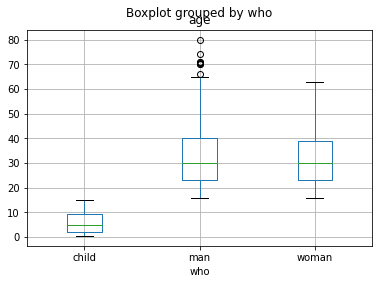

In [60]:
df.boxplot('age', by='who');